<h1 align=center><font size = 5>Area Plots, Histogram, dan Bar Chart</font></h1>

## Selamat datang!

Tujuan dari modul ini adalah untuk memperkenalkan Anda pada visualisasi data dengan *Area Plot, Histogram,* dan *Bar Charts.*

**Petunjuk pengerjaan:**

*   Buatlah salinan project berikut dengan memilih menu **File - Download**
*   Simpanlah file *.ipynb tersebut di Jupyter Notebook kamu.
*   Lalu kerjakan latihan-latihan di bawah ini.

**Petunjuk pengumpulan:**

*   Setelah selesai mengerjakan, uploadlah file *.ipynb tersebut ke e-learning yang digunakan di kelas ATAU simpan di GDrive kamu, lalu kumpulkan link-nya.
*   Kamu bertanggung jawab penuh untuk mengumpulkan link project di tugas yang bersesuaian.
*   Tidak ada protes untuk nilai yang menjadi nol jika link tidak sesuai dengan slot tugas.

## Tujuan Pembelajaran
Dengan mempelajari modul ini, diharapkan siswa memiliki:
*   pengetahuan tentang konsep visualisasi data sehingga siswa dapat menilai dan memutuskan teknik terbaik untuk memvisualisasikan data tertentu.

**Catatan**: Mayoritas plot dan visualisasi akan dibuat menggunakan data yang disimpan dalam DataFrame *Pandas*.

## Daftar isi

<div class = "alert alert-block alert-info" style = "margin-top: 20px">

1. [Menjelajahi Dataset  dengan _Pandas_](#0)<br>
2. [Mendownload dan Mempersiapkan Data](#2)<br>
3. [Memvisualisasikan Data Menggunakan Matplotlib](#4) <br>
4. [Plot Area](#6) <br>
5. [Histogram](#8) <br>
6. [Grafik Batang](#10) <br>
     </div>

# Menjelajahi Set Data dengan _pandas_ dan Matplotlib <a id="0"> </a>

Modul ini akan menggunakan dataset: Imigrasi ke Kanada dari 1980 hingga 2013. Dataset berisi data tahunan arus migrasi internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan baik arus masuk maupun arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/ selanjutnya baik bagi orang asing maupun warga negara. Pada modul ini, kita  akan menggunakan data Imigrasi Kanada.

# Mendownload dan Menyiapkan Data <a is="2"> </a>

Impor Modul Utama. Hal pertama yang akan kita lakukan adalah mengimpor dua modul utama untuk melakukan analisis data : **Pandas** dan **Numpy**.

In [1]:
import numpy as np  # berguna untuk banyak komputasi ilmiah dengan Python
import pandas as pd # library (pustaka) struktur data utama

Mari unduh dan impor kumpulan data i
migrasi Kanada menggunakan metode _Pandas_ `read_excel()`, kemudian simpan dalam _Pandas_ dataframe .

In [2]:

df_can = pd.read_excel('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Mari kita lihat lima baris pertama dalam dataset kita.

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Mari kita cari tahu berapa banyak baris data yang ada di kumpulan data kita.

In [4]:
# mencetak dimensi dataframe
print(df_can.shape)

(195, 43)


Untuk mempermudah pembuatan visualisasi, mari kita buat beberapa modifikasi pada dataset asli.

#### 1. Bersihkan dataset dengan menghapus kolom yang tidak informatif untuk visualisasi (mis. Type, AREA, REG).

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# Mari kita lihat lima elemen pertama dan lihat bagaimana dataframe diubah
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Perhatikan bahwa kolom Type, Coverage, AREA, REG, dan DEV dihapus dari dataframe.

#### 2. Ubah nama beberapa kolom sehingga lebih deskriptif.

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Mari kita lihat lima baris data pertama dan lihat bagaimana dataframe diubah
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Perhatikan bagaimana nama kolom sekarang menjadi lebih deskriptif.

#### 3. Untuk konsistensi, pastikan semua label kolom bertipe string.

In [7]:
# Mari kita periksa jenis label kolom
all(isinstance(column, str) for column in df_can.columns)

False

Perhatikan bagaimana baris kode di atas mengembalikan _False_ saat kita menguji semua label kolom apakah berjenis **string**. Jadi, mari kita ubah semuanya menjadi bertipe ** string **.

In [8]:
df_can.columns = list(map(str, df_can.columns))

# Mari kita periksa jenis label kolom sekarang
all(isinstance(column, str) for column in df_can.columns)

True

#### 4. Jadikan nama negara sebagai indeks - berguna untuk mencari negara dengan cepat menggunakan metode .loc.

In [9]:
df_can.set_index('Country', inplace=True)

# Mari kita lihat lima data pertama dan lihat bagaimana dataframe berubah
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


Perhatikan bagaimana nama negara sekarang berfungsi sebagai indeks.

#### 5. Tambahkan kolom total.

In [10]:
df_can['Total'] = df_can.sum(axis=1)

# Mari kita lihat lima baris pertama dan lihat bagaimana dataframe berubah
df_can.head()

C:\Users\putra\AppData\Local\Temp\ipykernel_7872\2941330123.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Sekarang *dataframe* memiliki kolom tambahan yang menampilkan jumlah total imigran dari setiap negara dalam dataset dari tahun 1980 - 2013. Jadi jika kita mencetak dimensi datanya, kita mendapatkan:

In [11]:
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


Jadi sekarang *dataframe* ini memiliki 38 kolom, bukan 37 kolom seperti sebelumnya.

In [12]:
# Terakhir, mari kita filter datanya hanya dari tahun 1980 - 2013
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

# Memvisualisasikan Data menggunakan Matplotlib <a id="4"> </a>

Import **Matplotlib** and **Numpy**.


In [13]:
# Gunakan instruksi inline untuk membuat plot di dalam browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: untuk gaya ggplot

# Memeriksa versi dari Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.0


# Area Plots<a id="6"></a>


Pada modul sebelumnya, kita membuat plot garis yang memvisualisasikan 5 negara teratas yang menyumbang paling banyak imigran ke Kanada dari tahun 1980 hingga 2013. Dengan sedikit modifikasi pada kode, kita dapat memvisualisasikan plot ini sebagai plot kumulatif, juga dikenal sebagai **Plot Garis Bertumpuk** atau **Plot Area** (*Area Plot*).

In [14]:
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# 5 data pertama
df_top5 = df_can.head()

# lakukan transpose pada dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Plot area ditumpuk secara default. Dan untuk menghasilkan plot area bertumpuk, setiap kolom harus berupa semua nilai positif atau semua nilai negatif. Nilai NaN (*Not a Number*) akan dibuat secara *default* menjadi 0). Untuk menghasilkan plot tidak bertumpuk, set parameter `stacked = False`.

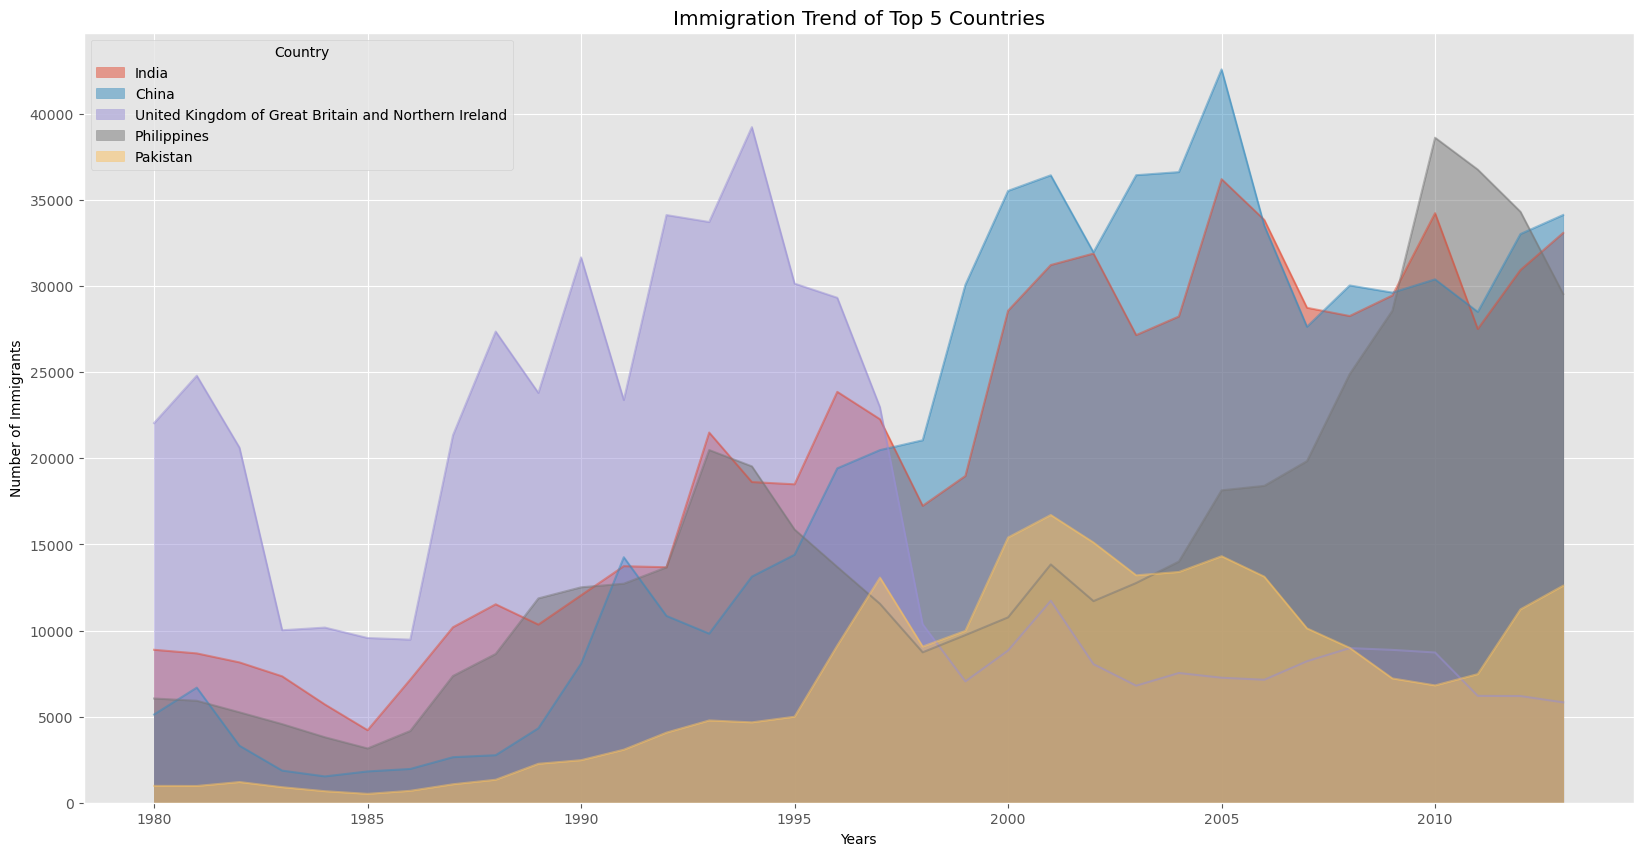

In [15]:
df_top5.index = df_top5.index.map(int) # Mari kita ubah nilai indeks df_top5 menjadi tipe integer untuk plotting
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10), # sebuah tuple (x, y) yang menyatakan ukuran
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Plot tidak bertumpuk memiliki transparansi default (nilai alfa) = 0,5. Kita dapat mengubah nilai ini dengan memasukkan parameter `alpha`.

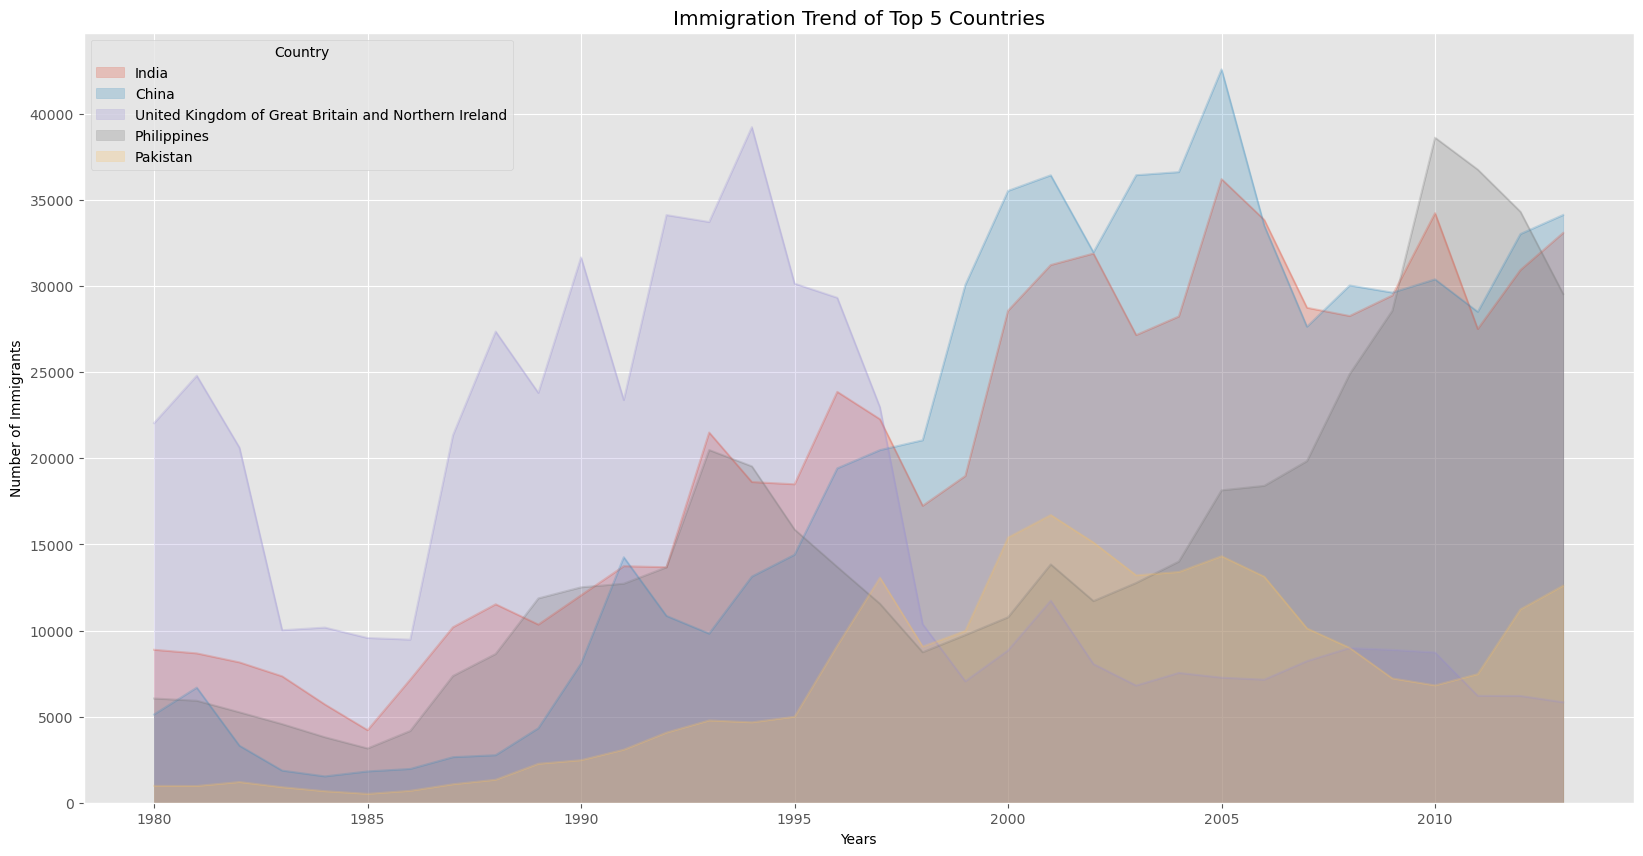

In [16]:
df_top5.plot(kind='area',
             alpha=0.25, # range nilai = 0-1, default value a = 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Dua jenis plot

Ada dua gaya / pilihan plot dengan `matplotlib`:
Membuat plot menggunakan
*    lapisan Artis atau
*    lapisan skrip.

**Opsi 1: Lapisan skrip (metode prosedural) - menggunakan matplotlib.pyplot sebagai 'plt'**

Anda dapat menggunakan `plt` yaitu` matplotlib.pyplot` dan menambahkan lebih banyak elemen dengan memanggil metode yang berbeda secara prosedural. Misalnya:
*   `plt.title(...)` untuk menambahkan judul atau
*   `plt.xlabel(...)` untuk menambahkan label ke sumbu x.

```python
    # Opsi 1 inilah yang telah kita gunakan sejauh ini
     df_top5.plot (jenis = 'area', alpha = 0,35, figsize = (20, 10))
     plt.title ('Tren imigrasi dari 5 negara teratas')
     plt.ylabel ('Jumlah imigran')
     plt.xlabel ('Tahun')
```

**Opsi 2: Lapisan artis (Metode berorientasi objek) - menggunakan turunan `Axes` dari Matplotlib (lebih baik)**

Anda dapat menggunakan *instance* dari `Axes` dan menyimpannya dalam sebuah variabel (misalnya,` ax`). Anda dapat menambahkan lebih banyak elemen dengan memanggil metode dengan sedikit perubahan dalam sintaks (dengan menambahkan "_set__" ke metode sebelumnya). Misalnya:
*   gunakan `ax.set_title ()` bukan `plt.title ()` untuk menambahkan judul, atau
*   `ax.set_xlabel ()` bukan `plt.xlabel ()` untuk menambahkan label ke sumbu x.

Opsi ini terkadang lebih transparan dan fleksibel untuk digunakan pada plot tingkat lanjut (khususnya jika memiliki banyak plot, seperti yang akan Anda lihat nanti).

Tetapi dalam modul ini, kita akan tetap menggunakan **lapisan skrip**, kecuali untuk beberapa visualisasi lanjut di mana kita perlu menggunakan **lapisan artis** untuk melakukan manipulasi lanjutan dari plot.

Text(0.5, 0, 'Years')

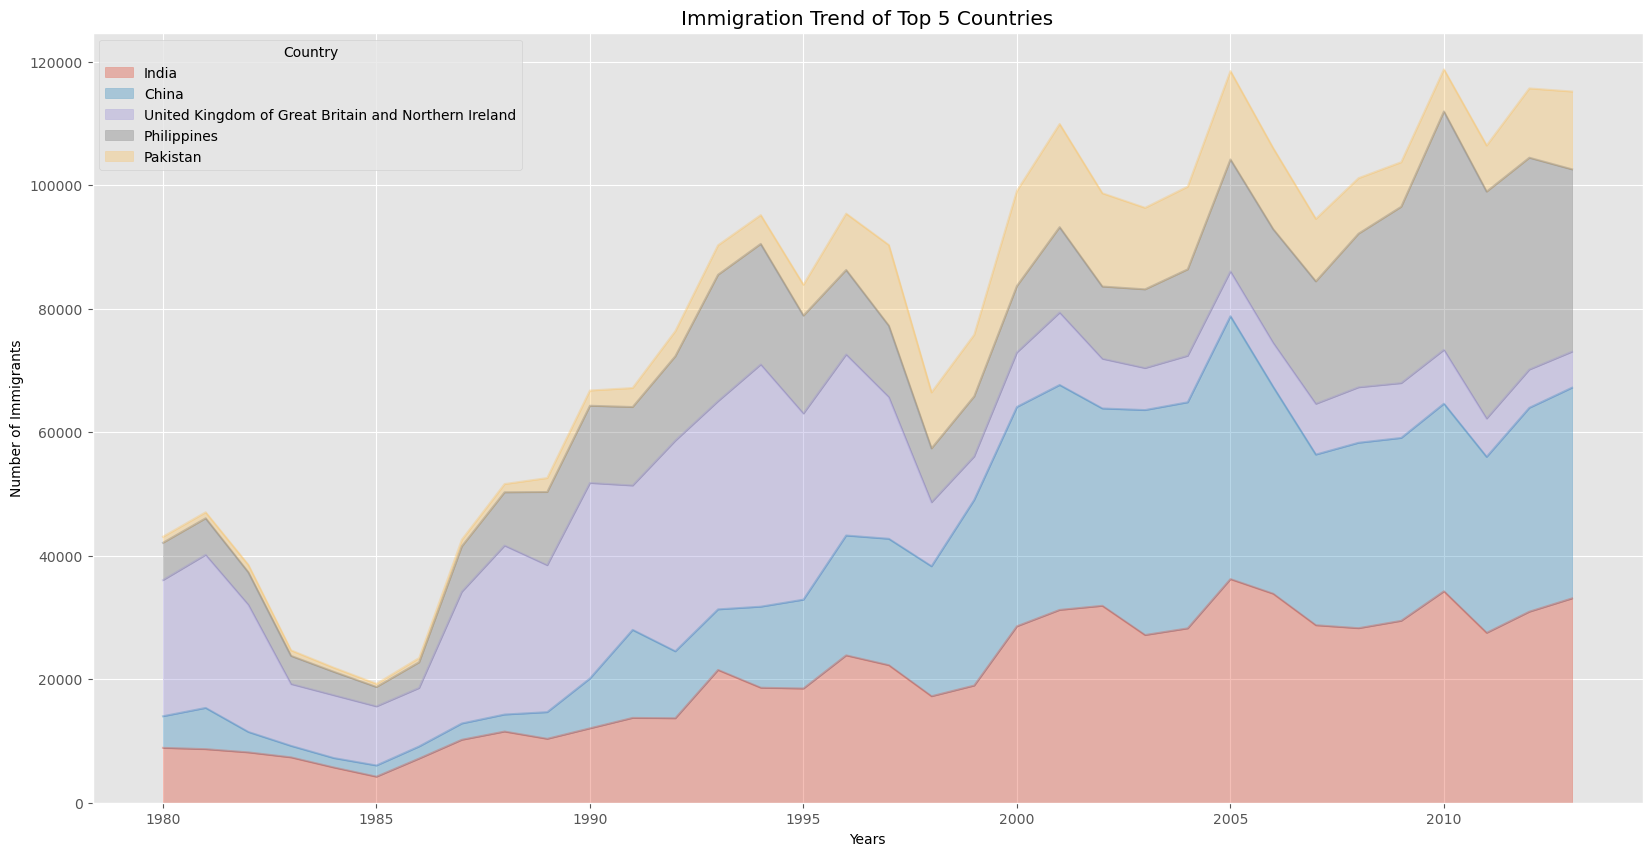

In [17]:
# Opsi 2: opsi yang lebih baik karena menawarkan lebih banyak fleksibilitas
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

**Pertanyaan**:

*  Gunakan lapisan skrip untuk membuat plot area bertumpuk dari 5 negara yang berkontribusi paling sedikit terhadap imigrasi ke Kanada dari tahun 1980 hingga 2013.
*  Gunakan nilai transparansi 0,45.

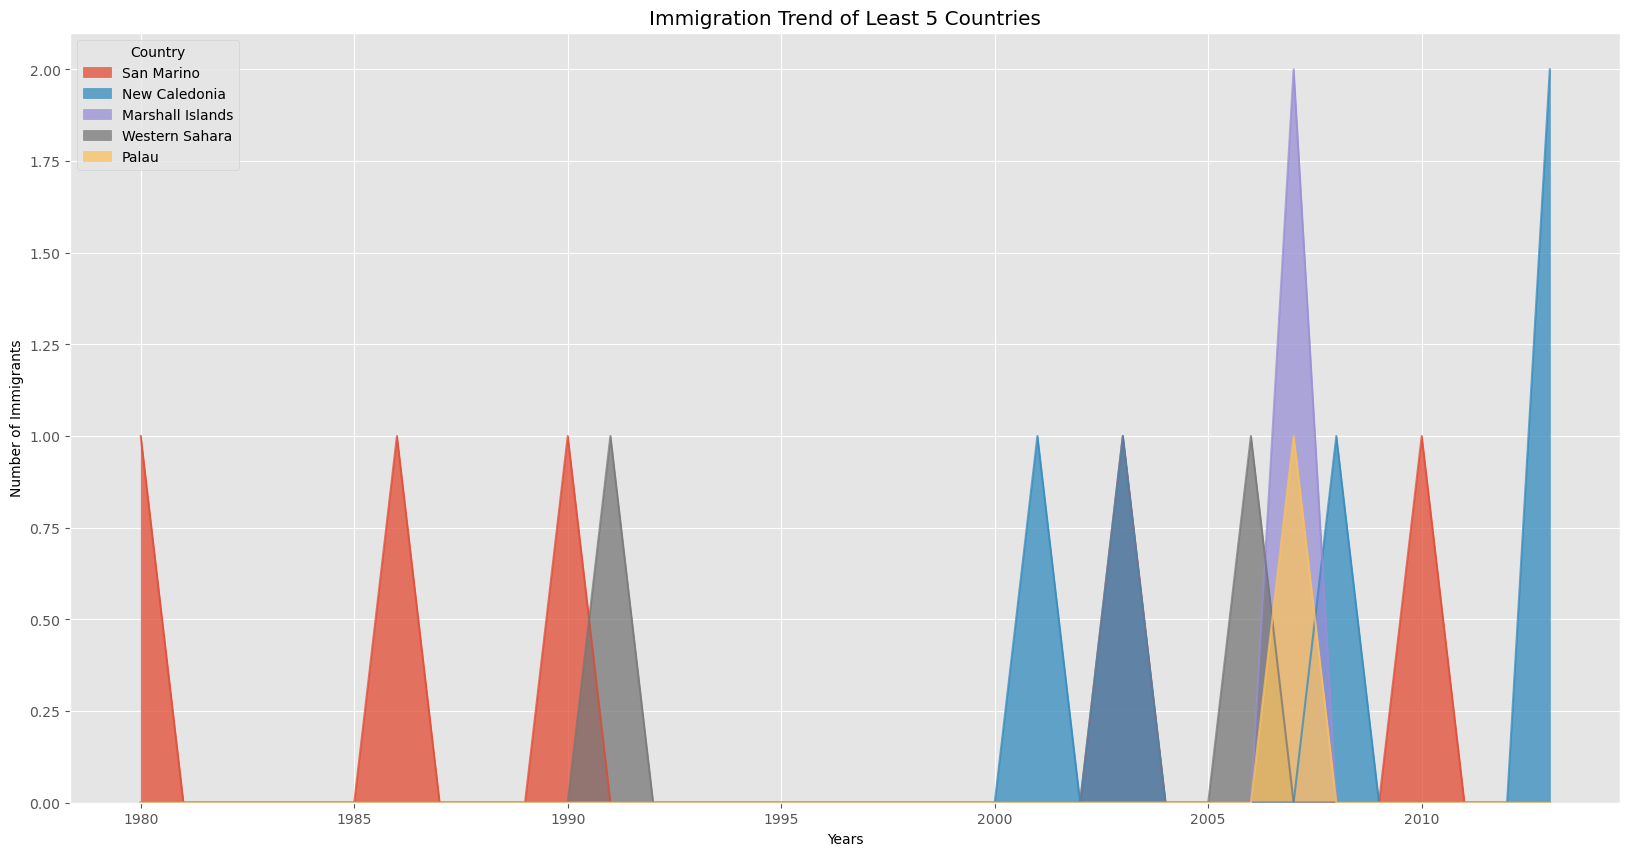

In [20]:
### ketikkan jawaban Anda di sini

df_last5 = df_can.tail()

df_last5 = df_last5[years].transpose()

df_last5.index = df_top5.index.map(int)

df_last5.plot(kind='area',
             alpha=0.75, 
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration Trend of Least 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()


**Pertanyaan**:

*   Gunakan lapisan artis untuk membuat *unstacked area plot* dari 5 negara yang berkontribusi paling sedikit terhadap imigrasi ke Kanada dari tahun 1980 hingga 2013.
*   Gunakan nilai transparansi 0,55.

Text(0.5, 0, 'Years')

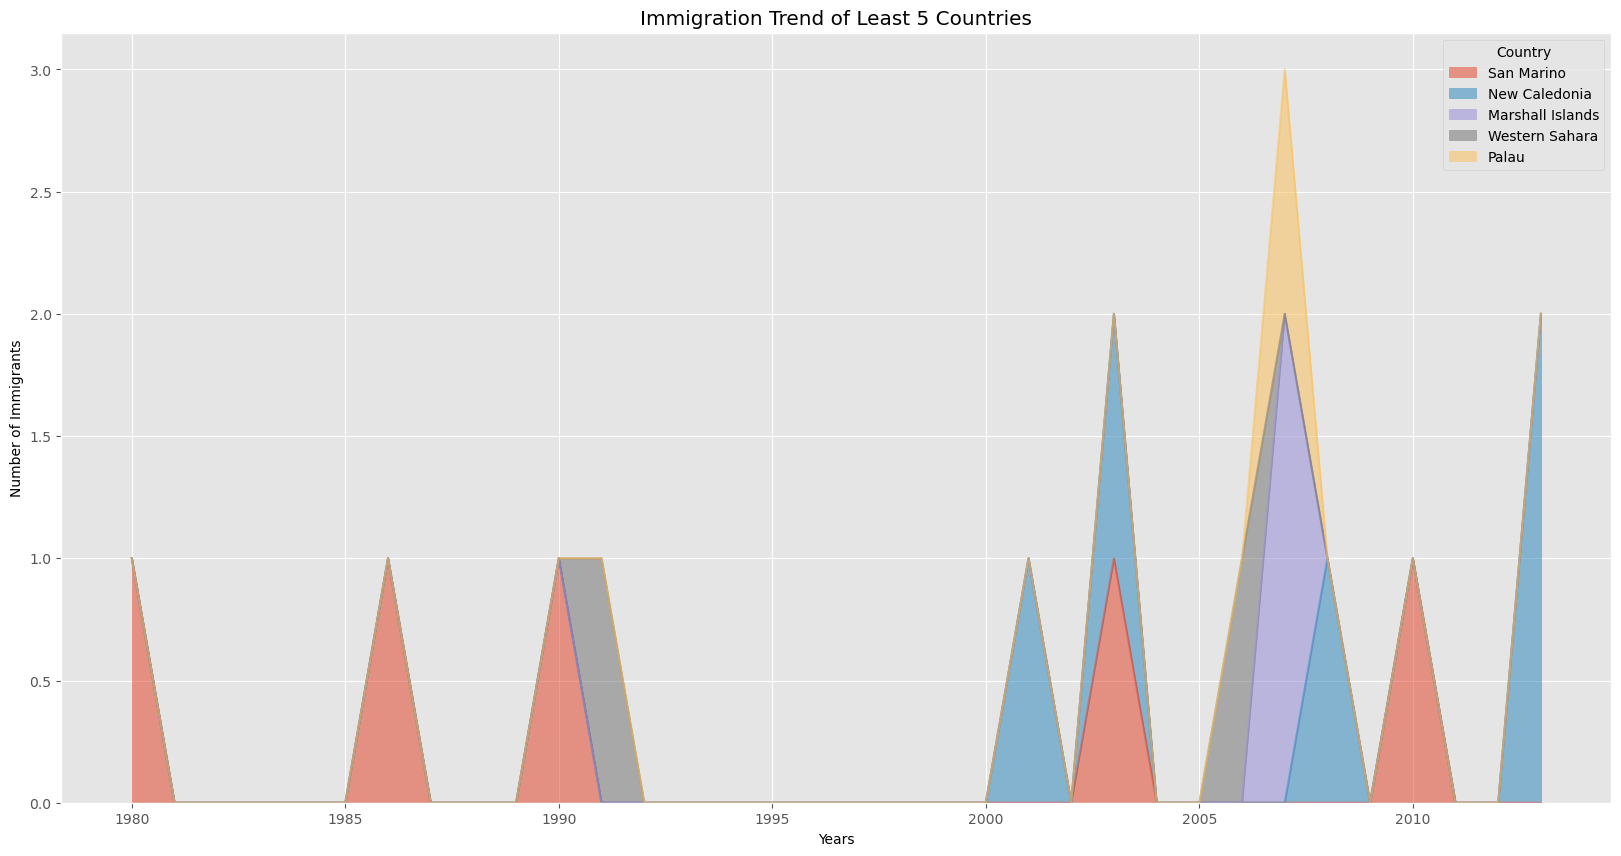

In [22]:
### ketikkan jawaban Anda di sini

ax2 = df_last5.plot(kind='area', alpha=0.55, figsize=(20, 10))

ax2.set_title('Immigration Trend of Least 5 Countries')
ax2.set_ylabel('Number of Immigrants')
ax2.set_xlabel('Years')



# Histogram <a id="8"> </a>

Histogram adalah cara untuk merepresentasikan distribusi frekuensi dari kumpulan data numerik. Cara kerjanya adalah:
*   mempartisi sumbu x ke dalam beberapa kelompok (_bins_), kemudian
*   memasukkan setiap data dalam dataset ke kelompok (_bins_) yang sesuai, dan kemudian
*   menghitung jumlah data dalam masing-masing kelompok (_bins_).

Jadi sumbu y adalah frekuensi atau banyaknya data pada setiap kelompok (_bins_).

Perhatikan bahwa kita dapat mengubah ukuran (_bins_) dan biasanya kita perlu menyesuaikannya agar distribusinya dapat ditampilkan dengan baik.

**Pertanyaan:**

Bagaimana sebaran frekuensi jumlah (penduduk) pendatang baru dari berbagai negara ke Kanada pada tahun 2013?

Sebelum membuat plot histogram, pertama mari kita periksa data yang dibagi menjadi beberapa interval. Untuk melakukan ini, kita gunakan metode `histrogram` **Numpy** untuk mendapatkan rentang bin dan jumlah frekuensi sebagai berikut:

In [25]:
# Mari kita lihat lima data pertama tahun 2013
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [26]:
# np.histogram mengembalikan 2 nilai
count, bin_edges = np.histogram(df_can['2013'])

print(count)      # hasil hitung frekuensi
print(bin_edges)  # banyaknya kelompok (bin), default = 10 kelompok (bins)

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


Secara default, metode `histrogram` memecah dataset menjadi 10 kelompok (*bin*).

Berikut rangkuman kisaran bin dan distribusi frekuensi imigrasi di tahun 2013:

- 178 negara menyumbang antara 0 hingga 3412,9 imigran
- 11 negara menyumbang antara 3412,9 hingga 6825,8 imigran
- 1 negara menyumbang antara 6285,8 hingga 10238,7 imigran, dan seterusnya ..

Kita dapat dengan mudah membuat grafik distribusi ini dengan men-set parameter `kind = hist` pada instruksi `plot()`.

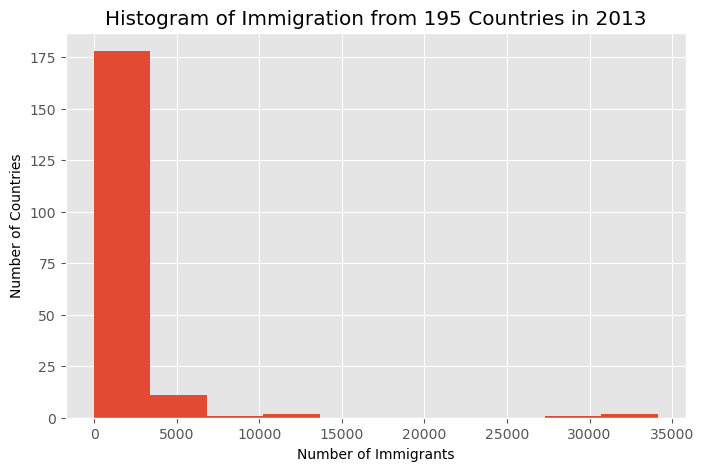

In [27]:
df_can['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') # menambahkan judul ke histogram
plt.ylabel('Number of Countries')   # menambahkan label sumbu y
plt.xlabel('Number of Immigrants')  # menambahkan label sumbu x

plt.show()

Pada plot di atas, sumbu x mewakili kisaran populasi imigran dalam interval 3412,9. Sumbu y mewakili jumlah negara yang berkontribusi pada populasi tersebut.

Perhatikan bahwa label sumbu x tidak cocok dengan ukuran bin. Ini dapat diperbaiki dengan memasukkan kata kunci `xticks` yang berisi daftar ukuran bin, sebagai berikut:

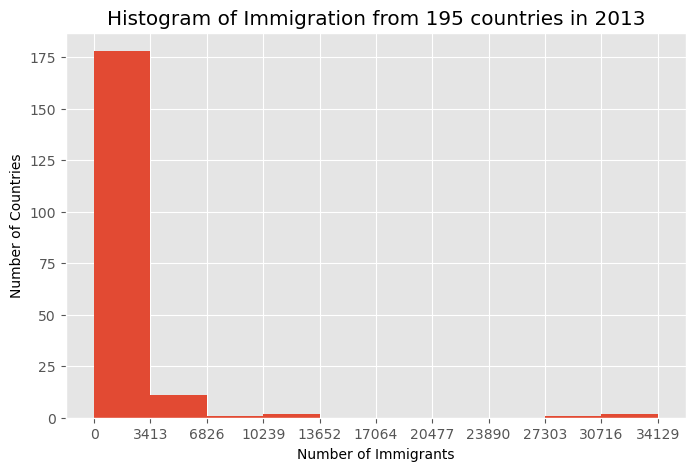

In [28]:
# 'bin_edges' adalah daftar interval bin
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # menambah judul histogram
plt.ylabel('Number of Countries')   # menambah label y
plt.xlabel('Number of Immigrants')  # menambah label x

plt.show()

_Catatan:_

Kita dapat menggunakan instruksi `df_can['2013'].plot.hist()`, sebagai gantinya.

*   Instruksi `some_data.plot (kind = 'type_plot', ...)` melakukan hal yang sama dengan `some_data.plot.type_plot (...)`.

Lihat dokumentasi _Pandas_ untuk info selengkapnya [http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740).

Kita dapat memplot beberapa histogram pada plot yang sama.

Sebagai contoh, mari kita coba menjawab pertanyaan-pertanyaan berikut ini dengan menggunakan histogram.

**Pertanyaan**:

Bagaimana distribusi imigrasi untuk Denmark, Norwegia, dan Swedia untuk tahun 1980 - 2013?

In [29]:
# Mari kita lihat dataset yang digunakan
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


<Axes: ylabel='Frequency'>

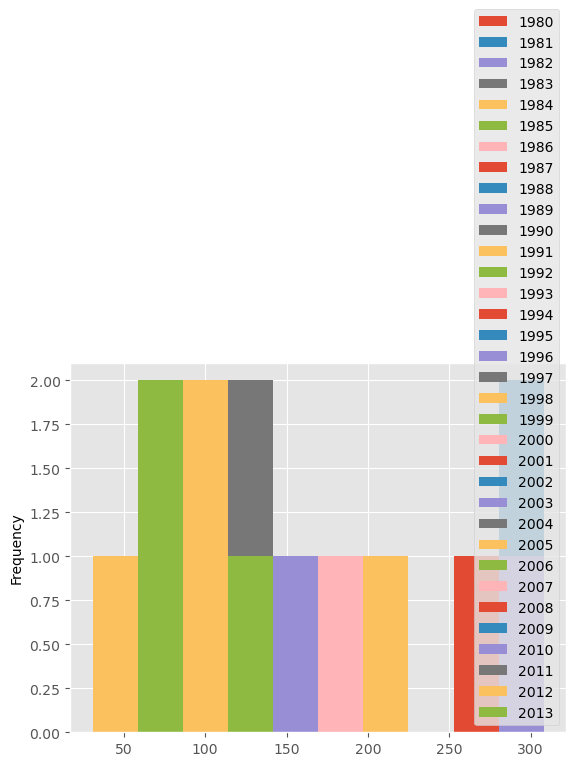

In [30]:
# Men-generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()

Kelihatannya tidak benar!

Hasil yang kita harapkan adalah plot distribusi frekuensi populasi populasi untuk 3 negara, tetapi _Pandas_ malah memetakan distribusi frekuensi populasi untuk `tahun`.

Jangan khawatir, Anda akan sering menjumpai situasi seperti ini saat membuat plot. Solusinya sering kali terletak pada bagaimana kumpulan data yang mendasarinya disusun.

Hal ini dapat dengan mudah diperbaiki dengan terlebih dahulu mengubah urutan dataset, dan kemudian memplot seperti yang ditunjukkan di bawah ini.

In [31]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


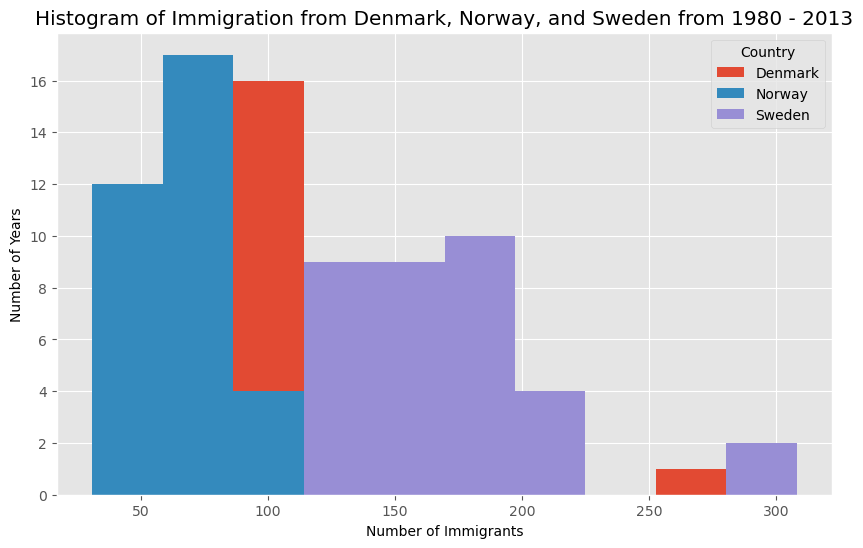

In [32]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Mari buat beberapa modifikasi untuk memperbaiki hasil visualisasi sebelumnya:

- tambah ukuran bin menjadi 15 dengan menggunakan parameter `bins`
- set transparansi menjadi 60% dengan menggunakan parameter `alpha`
- beri label sumbu x dengan menggunakan parameter `x-label`
- ubah warna plot dengan menggunakan parameter `color`

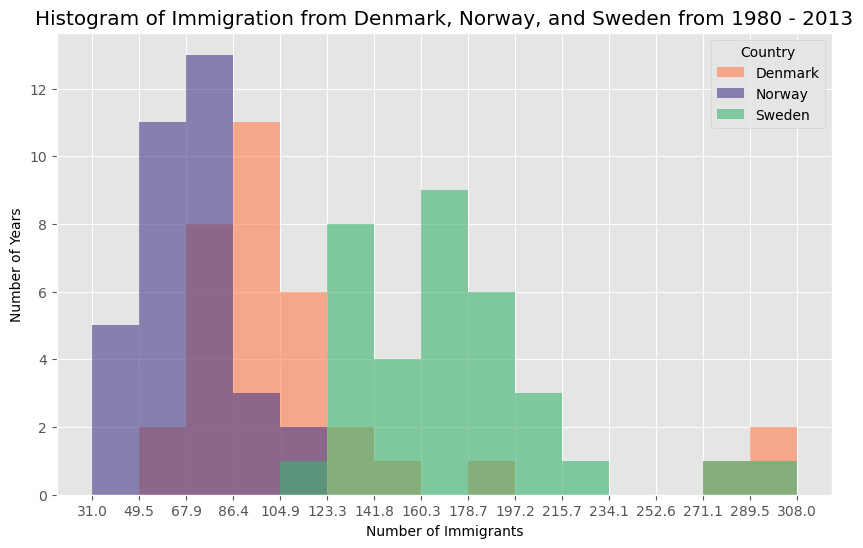

In [33]:
# dapatkan nilai x dengan fungsi histogram
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Tip:
Berikut adalah daftar lengkap warna yang tersedia di Matplotlib:

```python
#jalankan kode berikut di shell python Anda:
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
```


Jika kita tidak ingin plot saling tumpang tindih, kita dapat menumpuknya menggunakan parameter `stacked`. Mari kita juga menyesuaikan label sumbu x min dan maks untuk menghilangkan celah ekstra di tepi plot. Kita bisa mengirimkan tuple (min, max) menggunakan parameter `xlim`, seperti yang ditunjukkan di bawah ini.

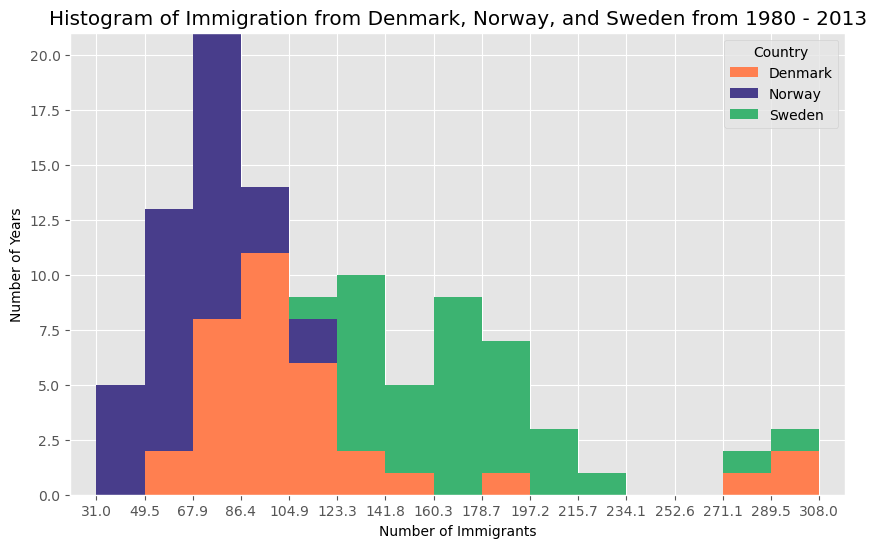

In [34]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  nilai bin pertama adalah 31.0, menambahkan buffer 10 untuk tujuan estetika
xmax = bin_edges[-1] + 10  #  nilai bin terakhir adalah 308.0, menambahkan buffer 10 untuk tujuan estetika

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

**Pertanyaan**:

Buatlah program menggunakan layer scripting untuk menampilkan distribusi imigrasi untuk Yunani, Albania, dan Bulgaria selama tahun 1980 - 2013!
*   Gunakan *overlapping plot* dengan 15 bin dan nilai transparansi 0,35.

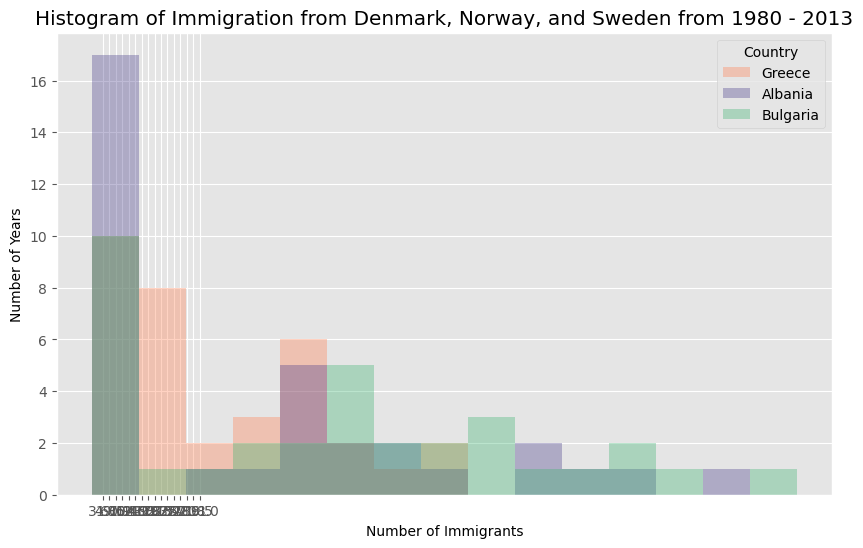

In [54]:
### ketikkan jawaban Anda di sini
YAB = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
YAB.head()

count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
YAB.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.35,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts (Dataframe) <a id="10"> </a>

*Bar charts* (diagram batang) adalah cara untuk merepresentasikan data di mana panjang batang mewakili besaran / ukuran fitur / variabel. Diagram batang biasanya mewakili variabel numerik dan kategori yang dikelompokkan dalam interval.

Untuk membuat diagram batang, kita dapat mengirimkan salah satu dari dua argumen berikut melalui parameter `kind` pada instruksi `plot()`:

- `kind = bar`  membuat diagram batang **vertikal**
- `kind = barh` membuat diagram batang **horizontal**

**Diagram batang vertikal**

Pada diagram batang vertikal, sumbu x digunakan untuk label kelas atau kategori, dan panjang batang pada sumbu y sesuai dengan besaran variabel yang diukur. Diagram batang vertikal sangat berguna dalam menganalisis data deret waktu. Salah satu kelemahan dari bentuk ini adalah ruang untuk pelabelan teks di bagian bawah kaki setiap batang terbatas.

**Mari kita mulai dengan menganalisis efek krisis keuangan Islandia:**

Krisis keuangan Islandia tahun 2008 - 2011 adalah peristiwa ekonomi dan politik utama di Islandia. Relatif terhadap ukuran ekonominya, keruntuhan perbankan sistemik Islandia adalah yang terbesar yang pernah dialami oleh negara mana pun dalam sejarah ekonomi. Krisis tersebut menyebabkan depresi ekonomi yang parah pada tahun 2008 - 2011 dan kerusuhan politik yang signifikan.

**Pertanyaan:**

Mari bandingkan jumlah imigran Islandia *(country = 'Iceland')* ke Kanada dari tahun 1980 hingga 2013.

In [55]:
# langkah 1: mendapatkan data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

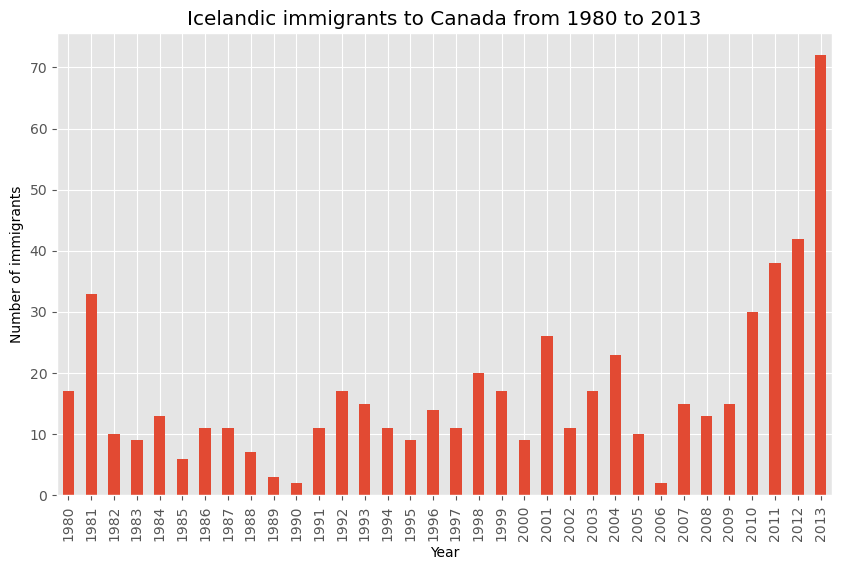

In [56]:
# langkah 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # menambahkan label x pada hasil plot
plt.ylabel('Number of immigrants') # menambahkan label y pada hasil plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # menambahkan judul pada hasil plot

plt.show()

Diagram batang di atas menunjukkan jumlah total imigran yang dikelompokkan setiap tahun. Kita bisa melihat dengan jelas dampak dari krisis keuangan; jumlah imigran ke Kanada mulai meningkat pesat setelah tahun 2008.

Mari kita beri anotasi pada plot menggunakan metode `annotate` dari **lapisan skrip** atau **antarmuka pyplot**. Kita akan gunakan parameter berikut:

-   `s`: str, teks anotasi (keterangan).
-   `xy`: Tuple yang menyatakan titik (x,y) untuk memberi keterangan (dalam contoh ini, titik akhir panah),
-   `xytext`: Tuple yang menyatakan titik (x, y) untuk menempatkan teks (dalam hal ini, titik awal panah).
-   `xycoords`: Sistem koordinat yang diberikan xy - 'data' menggunakan sistem koordinat dari objek yang diterangkan (default).
-   `arrowprops`: Menerima *dictionary* yang berisi properti untuk menggambar panah:
    -   `arrowstyle`: Mendefinisikan gaya panah, Bentuk `'->'` adalah gaya default.
    -   `connectionstyle`: Mendefinisikan tipe koneksi. Misal: `arc3` adalah garis lurus.
    -   `color`: Mendefinisikan warna panah.
    -   `lw`: Mendefinisikan ketebalan garis.

Baca dokumentasi Matplotlib untuk detail lebih lanjut tentang anotasi: [http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate](http://matplotlib.org/api/pyplot_api.html?utm_email=Email&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_campaign=PLACEHOLDER&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740#matplotlib.pyplot.annotate).


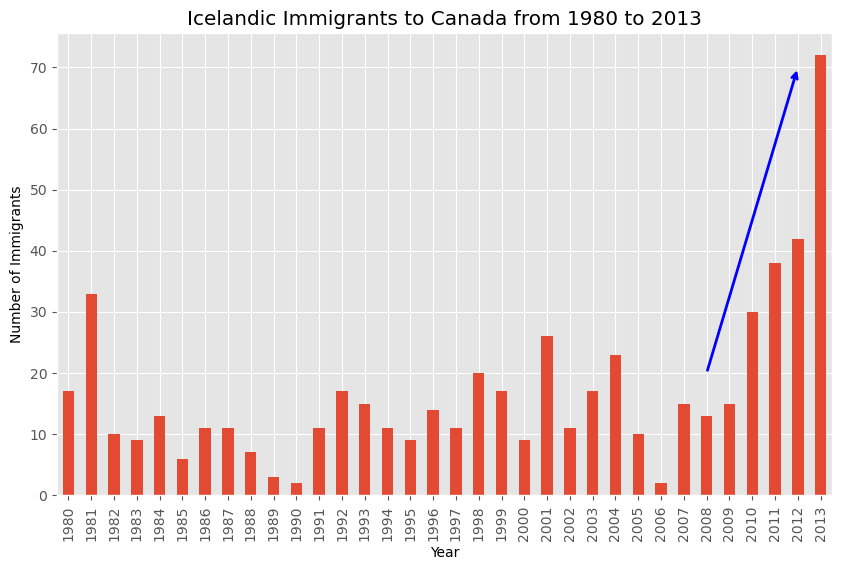

In [57]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Anotasi panah
plt.annotate('',                      # s: str. Biarkan kosong jika tidak ada teks
             xy=(32, 70),             # Menempatkan kepala panah di titik (tahun 2012, pop 70)
             xytext=(28, 20),         # Menempatkan dasar panah pada titik (tahun 2008, pop 20)
             xycoords='data',         # Menggunakan sistem koordinat dari objek yang dijelaskan
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

Mari kita juga memberi keterangan teks untuk panah. Gunakan parameter tambahan berikut:

- `rotation`: sudut rotasi teks dalam derajat (berlawanan arah jarum jam)
- `va`: pengaturan teks secara vertikal  [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: pengaturan teks secara horizontal [‘center’ | ‘right’ | ‘left’]

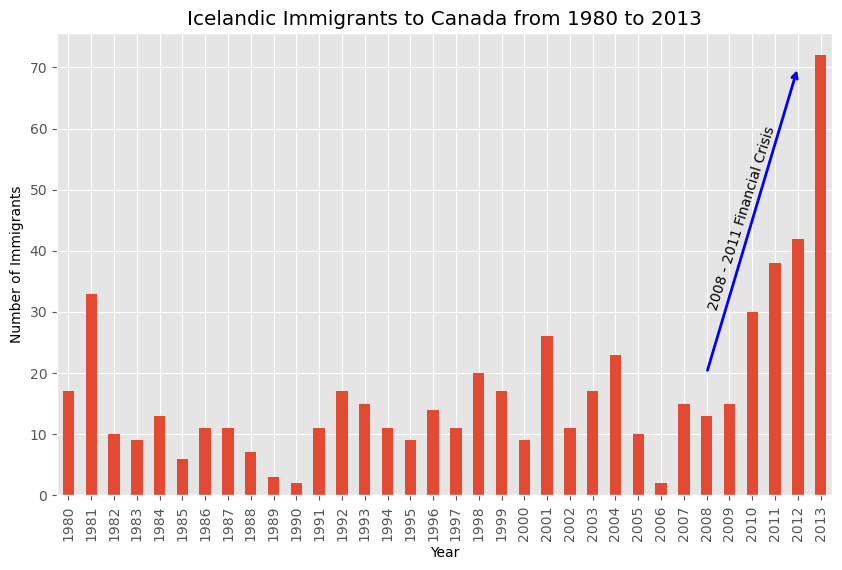

In [58]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Anotasi panah
plt.annotate('',                      # s: str. Biarkan kosong jika tidak ada teks
             xy=(32, 70),             # tempatkan kepala panah di titik (tahun 2012, pop 70)
             xytext=(28, 20),         # tempatkan dasar panah di titik (tahun 2008, pop 20)
             xycoords='data',         # gunakan sistem koordinat dari objek yang diterangkan
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Anotasi Teks
plt.annotate('2008 - 2011 Financial Crisis', # teks untuk ditampilkan
             xy=(28, 30),                    # mulai teks di titik (tahun 2008, pop 30)
             rotation=72.5,                  # berdasarkan trial & error untuk mencocokkan panah
             va='bottom',                    # vertical alignment: 'bottom'
             ha='left',                      # horizontal alignment: 'left'
            )

plt.show()

**Diagram Batang Horizontal**

Terkadang lebih praktis untuk merepresentasikan data secara horizontal, terutama jika Anda membutuhkan lebih banyak ruang untuk memberi label pada setiap batang. Pada diagram batang horizontal, sumbu y digunakan untuk pelabelan, dan panjang batang pada sumbu x sesuai dengan besaran variabel yang diukur. Seperti yang akan Anda lihat, ada lebih banyak ruang pada sumbu y untuk memberi label variabel kategoris.

**Pertanyaan:**

Dengan menggunakan lapisan *script* dan dataset `df_can`, buatlah plot diagram batang horizontal yang menunjukkan _total_ jumlah imigran ke Kanada dari 15 negara teratas, untuk periode 1980 - 2013. Beri label untuk setiap negara dengan total imigrannya.

Langkah 1: Dapatkan data yang berkaitan dengan 15 negara teratas.

In [83]:
### ketik jawaban Anda di sini
dfTop15 = df_can.head(15)
dfTop15 = dfTop15[years].transpose()




Langkah 2: Data plot:

1. Gunakan `kind = 'barh'` untuk membuat diagram batang dengan batang horizontal.
2. Pastikan untuk memilih ukuran yang baik untuk plot dan memberi label pada sumbu Anda dan memberi judul pada plot.
3. Plot untuk 15 negara dan beri keterangan tentang populasi imigran menggunakan fungsi *anotate* dari antarmuka *scripting*.

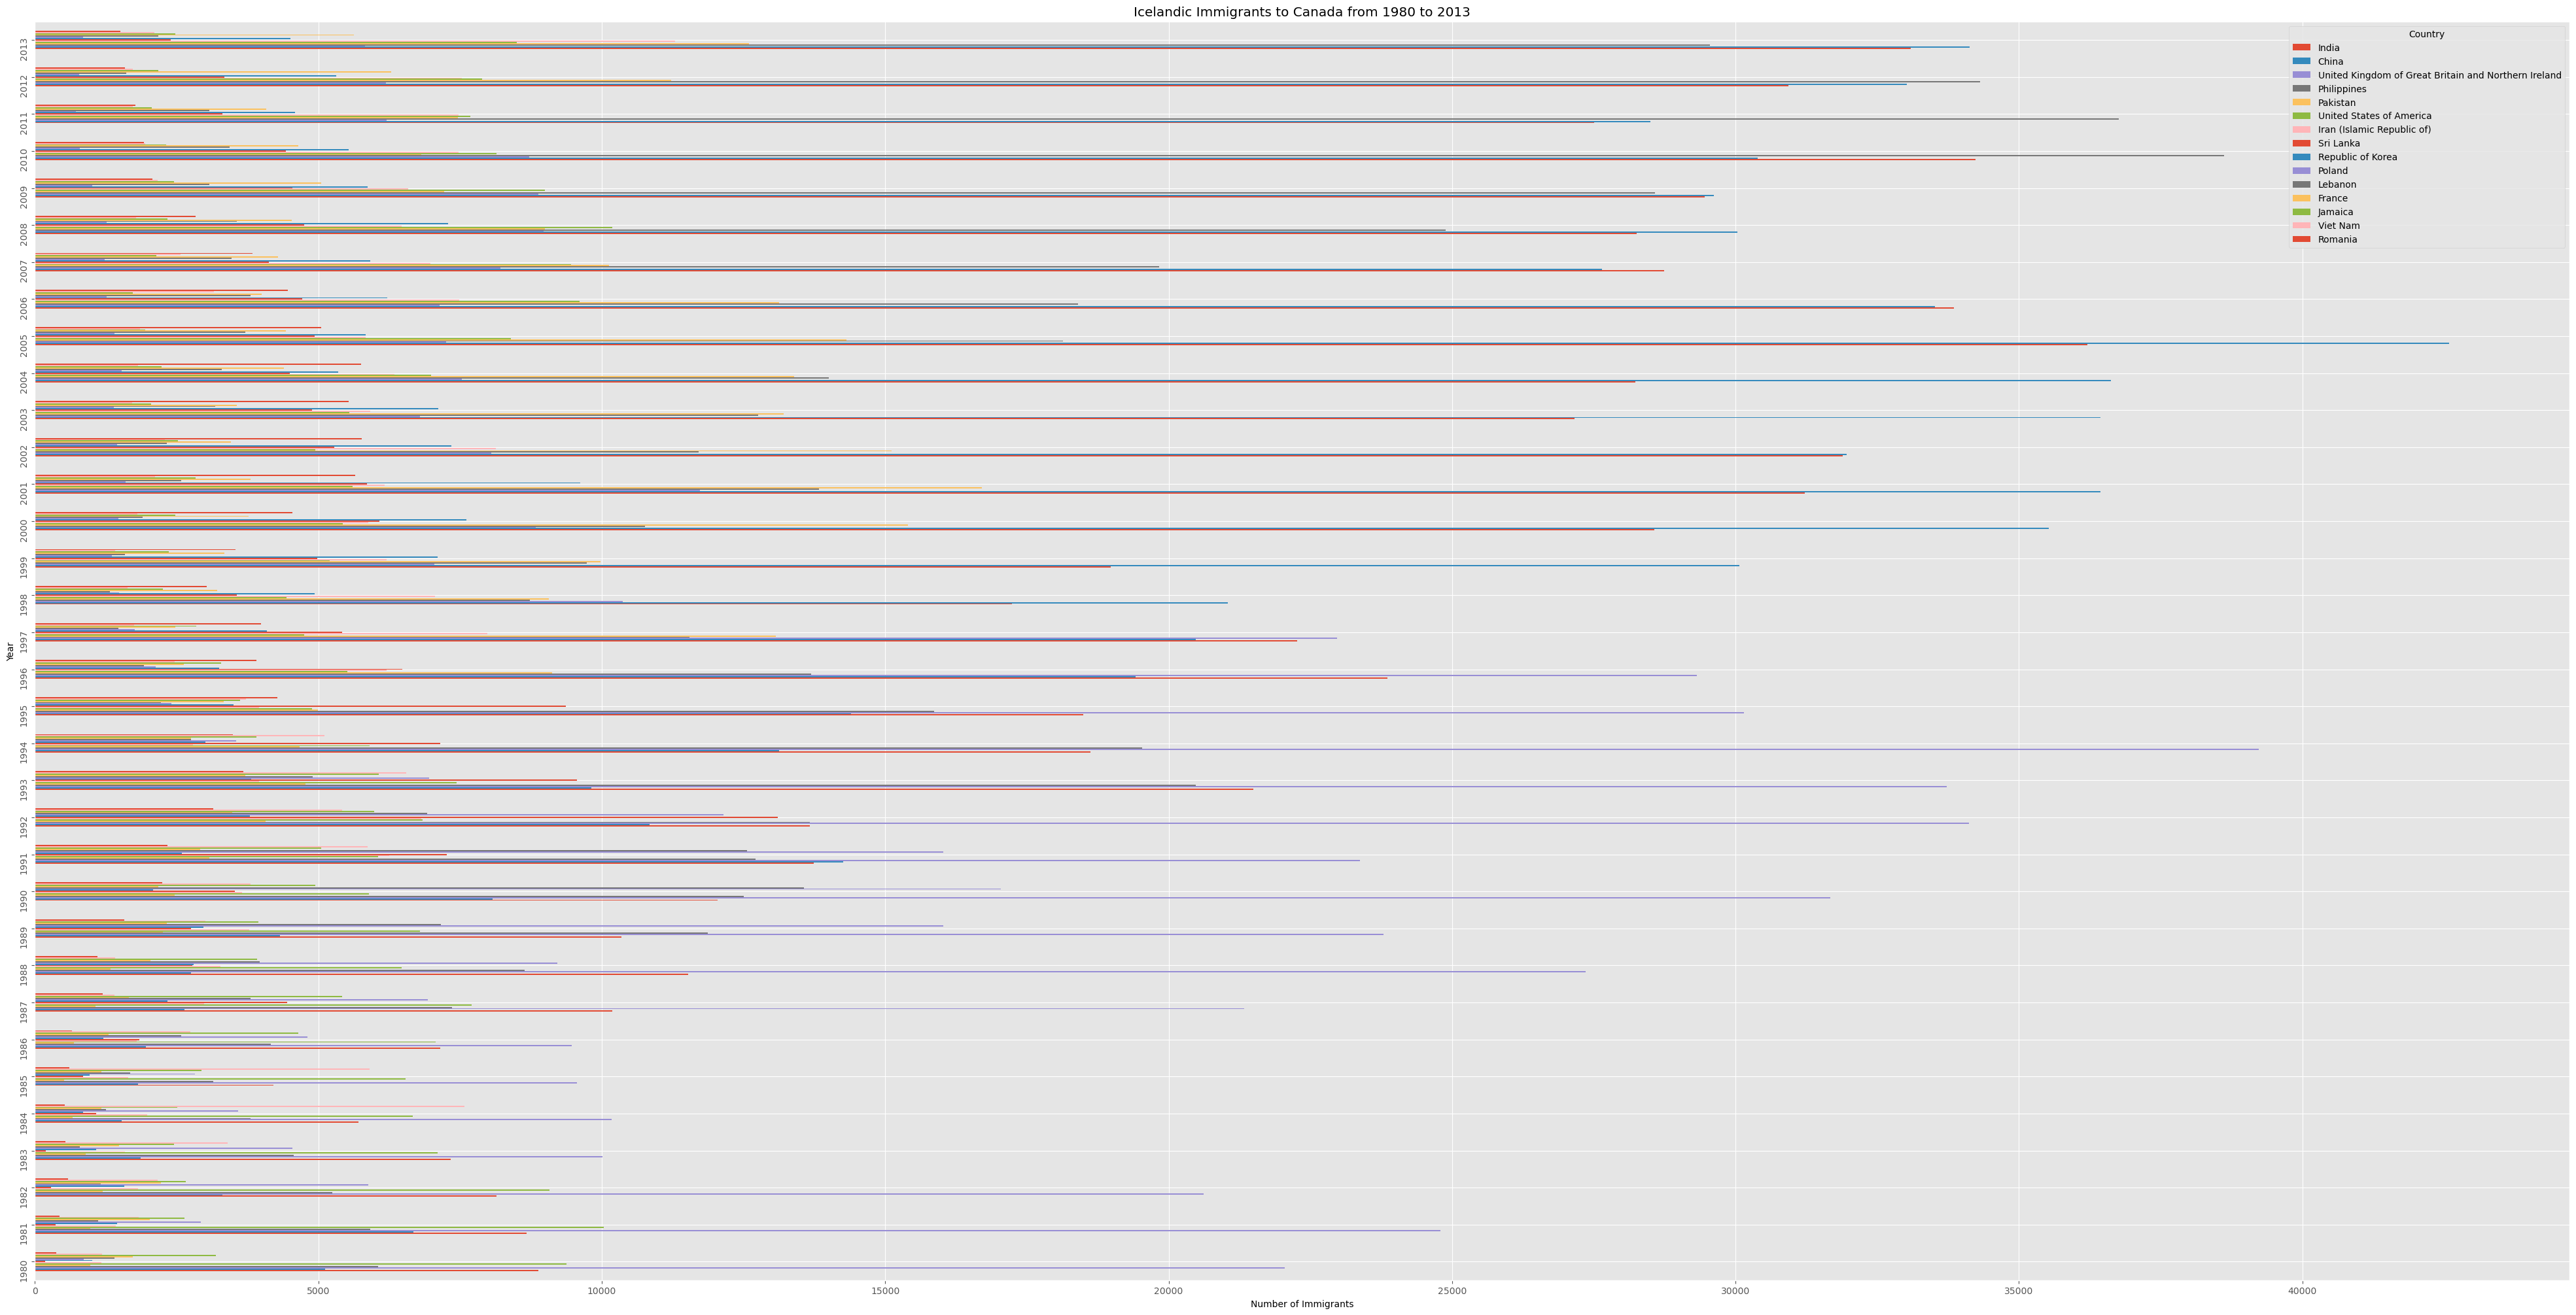

In [87]:
### ketik jawaban Anda di sini

dfTop15.plot(kind='barh', figsize=(50, 25), rot=90) # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Number of Immigrants')
plt.ylabel('Year')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Anotasi panah
plt.annotate('',                      # s: str. Biarkan kosong jika tidak ada teks
             xy=(32, 70),             # Menempatkan kepala panah di titik (tahun 2012, pop 70)
             xytext=(28, 20),         # Menempatkan dasar panah pada titik (tahun 2008, pop 20)
             xycoords='data',         # Menggunakan sistem koordinat dari objek yang dijelaskan
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

plt.show()

### Selamat Anda telah menyelesaikan modul Matplotlib kedua!

Jika ada pertanyaan terkait modul ini, tanyakan via Discord.